# Potential Energy Surface of the Water Molecule

## Overview
In this notebook, we will use TenCirChem to build the potential energy surface of $\rm{H_2O}$ molecule at UCCSD/STO-3G level of theory.
Without incurring active space approximation, the system consists of 6 spatial orbitals and 8 electrons.
Under Jordan-Wigner approximation, 12 qubits are required to simulate the system.

We highlight how easy it is to solve chemistry problems with TenCirChem.
We also highlight that the whole PES consisting of 100 points is contructed on a laptop within 1 minute.

## Setup

Build a series of PySCF `mole`s for UCCSD calculation. 

The bond angles range from 80° to 115° and the bond lengths range from 0.90Å to 1.15Å.
10 points are sample from each DOF, resulting in totally 100 geometries.

In [1]:
import numpy as np

# TenCirChem accepts PySCF Mole as input
from pyscf import M


# assuming the same O-H length for the two bonds
def get_h2o_m(bond_angle, bond_length):
    phi = bond_angle / 2
    r = bond_length
    O = ["O", 0, 0, 0]
    H1 = ["H", -r * np.sin(phi), r * np.cos(phi), 0]
    H2 = ["H", r * np.sin(phi), r * np.cos(phi), 0]
    return M(atom=[O, H1, H2])

In [2]:
# PES range
bond_angles = np.linspace(80, 115, 10) / 180 * np.pi
# in angstrom
bond_lengths = np.linspace(0.90, 1.15, 10)

# build molecules
from itertools import product

moles = []
for bond_angle, bond_length in product(bond_angles, bond_lengths):
    moles.append(get_h2o_m(bond_angle, bond_length))
len(moles)

100

## Calculate

For each `mole` in `moles`, calculate UCCSD energy using the `UCCSD` class from TenCirChem.

In [3]:
import time
from tencirchem import UCCSD

res = []
time1 = time.time()
for m in moles:
    # skip CCSD and FCI to speedup
    uccsd = UCCSD(m, run_ccsd=False, run_fci=False)
    res.append(uccsd.kernel())
time2 = time.time()
time2 - time1

38.372753381729126

## Plot

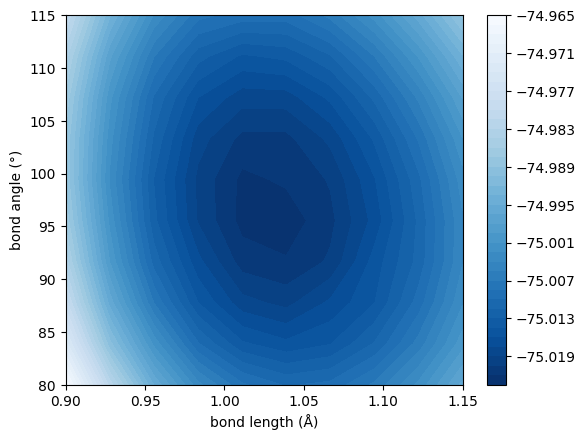

In [4]:
from matplotlib import pyplot as plt

plt.contourf(bond_lengths, bond_angles / np.pi * 180, np.array(res).reshape(10, 10), cmap="Blues_r", levels=50)
plt.colorbar()
plt.xlabel("bond length (Å)")
plt.ylabel("bond angle (°)")
plt.show()